# Laboratorio 14
## Grupo 10 - integrantes:
*   Julian Esteban Santos Martinez
*   Santiago Vargas Avendaño

1. Maximum Amount of Gold

In [1]:
%%writefile MaxAmountGold.cpp
#include <iostream>
#include <vector>
using namespace std;

int optimal_weight(int W, const vector<int> &w) {
    const int w_size = w.size();
    int** weights = new int* [w_size + 1];

    for (int i = 0; i <= w_size; i++) {
        weights[i] = new int[W + 1];
    }

    for (int i = 0; i <= w_size; i++) {
        for (int j = 0; j <= W; j++) {      
            if (i==0 || j==0) {
            weights[i][j] = 0;
            }
            else if (w[i - 1] <= j) 
            weights[i][j] = max(w[i - 1] + weights[i - 1][j - w[i - 1]],  weights[i - 1][j]);
            else
            weights[i][j] = weights[i - 1][j];
        }
    }

    int result = weights[w_size][W];

    for (int i = 0; i < w_size; i++) {
        delete[] weights[i];
    }

    delete[] weights;

    return result;
}

int main() {
    int W,n;
    cin >> W;
    cin >> n;
    vector<int> bars(n);
    for(int i=0;i<n;i++){
        cin >> bars[i];
    }
    cout << optimal_weight(W,bars) << "\n";
    return 0;
}

Writing MaxAmountGold.cpp


In [ ]:
!g++ MaxAmountGold.cpp -o MaxAmountGold
!./MaxAmountGold

10 3
1 4 8
9


3. Maximum Value of an Arithmetic Expression


In [2]:
%%writefile MaximumValueArithmeticExpression.cpp
#include <iostream>
#include <cassert>
#include <string>
#include <vector>
#include <cstring>
#include <climits>
#include <cmath>
using std::vector;
using std::string;
using std::max;
using std::min;

long long eval(long long a, long long b, char op) {
  if (op == '*') {
    return a * b;
  } else if (op == '+') {
    return a + b;
  } else if (op == '-') {
    return a - b;
  } else {
    assert(0);
  }
}

long long get_maximum_value(const string &exp) {
  int length = exp.size();
  int numOfnum = (length + 1) / 2;
  long long minArray[numOfnum][numOfnum];
  long long maxArray[numOfnum][numOfnum];
  memset(minArray,0,sizeof(minArray)); // initialize to 0
  memset(maxArray,0,sizeof(maxArray));
  for (int i = 0; i < numOfnum; i++)
  {
	  //The values on the main diagonal is just the number themselves
	  minArray[i][i] = std::stoll(exp.substr(2*i,1));
	  maxArray[i][i] = std::stoll(exp.substr(2*i,1));
  }

  for (int s = 0; s < numOfnum - 1; s++)
  {
	  for (int i = 0; i < numOfnum - s - 1; i++)
	  {
		  int j = i + s + 1;
		  long long minVal = LLONG_MAX;
	      long long maxVal = LLONG_MIN;
	      // find the minimum and maximum values for the expression
	      // between the ith number and jth number
		  for (int k = i; k < j; k++ )
	      {
			  long long a = eval(minArray[i][k],minArray[k + 1][j],exp[2 * k + 1]);
			  long long b = eval(minArray[i][k],maxArray[k + 1][j],exp[2 * k + 1]);
			  long long c = eval(maxArray[i][k],minArray[k + 1][j],exp[2 * k + 1]);
			  long long d = eval(maxArray[i][k],maxArray[k + 1][j],exp[2 * k + 1]);
			  minVal = min(minVal,min(a,min(b,min(c,d))));
			  maxVal = max(maxVal,max(a,max(b,max(c,d))));
	      }
		  minArray[i][j] = minVal;
		  maxArray[i][j] = maxVal;
	  }
  }

  return maxArray[0][numOfnum - 1];
}

int main() {
  string s;
  std::cin >> s;
  std::cout << get_maximum_value(s) << '\n';
}

Writing MaximumValueArithmeticExpression.cpp


In [ ]:
!g++ MaximumValueArithmeticExpression.cpp -o MaximumValueArithmeticExpression
!./MaximumValueArithmeticExpression

5-8+7*4-8+9
200


Pantallazo Santiago

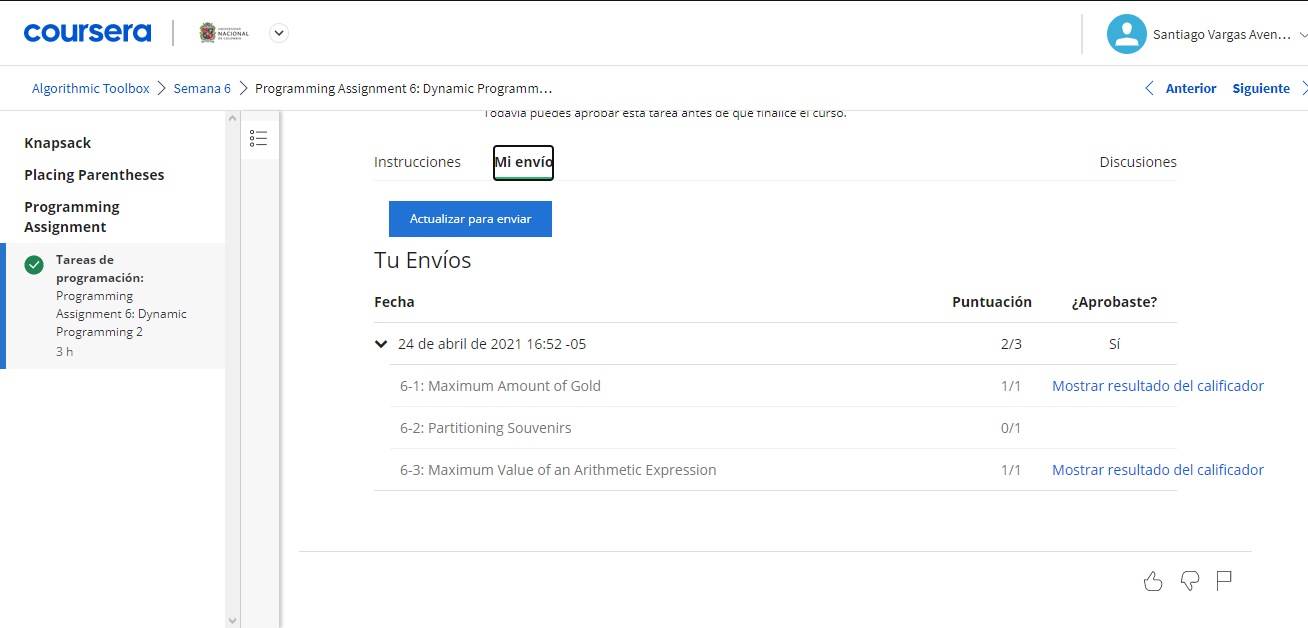

Pantallazo Julian

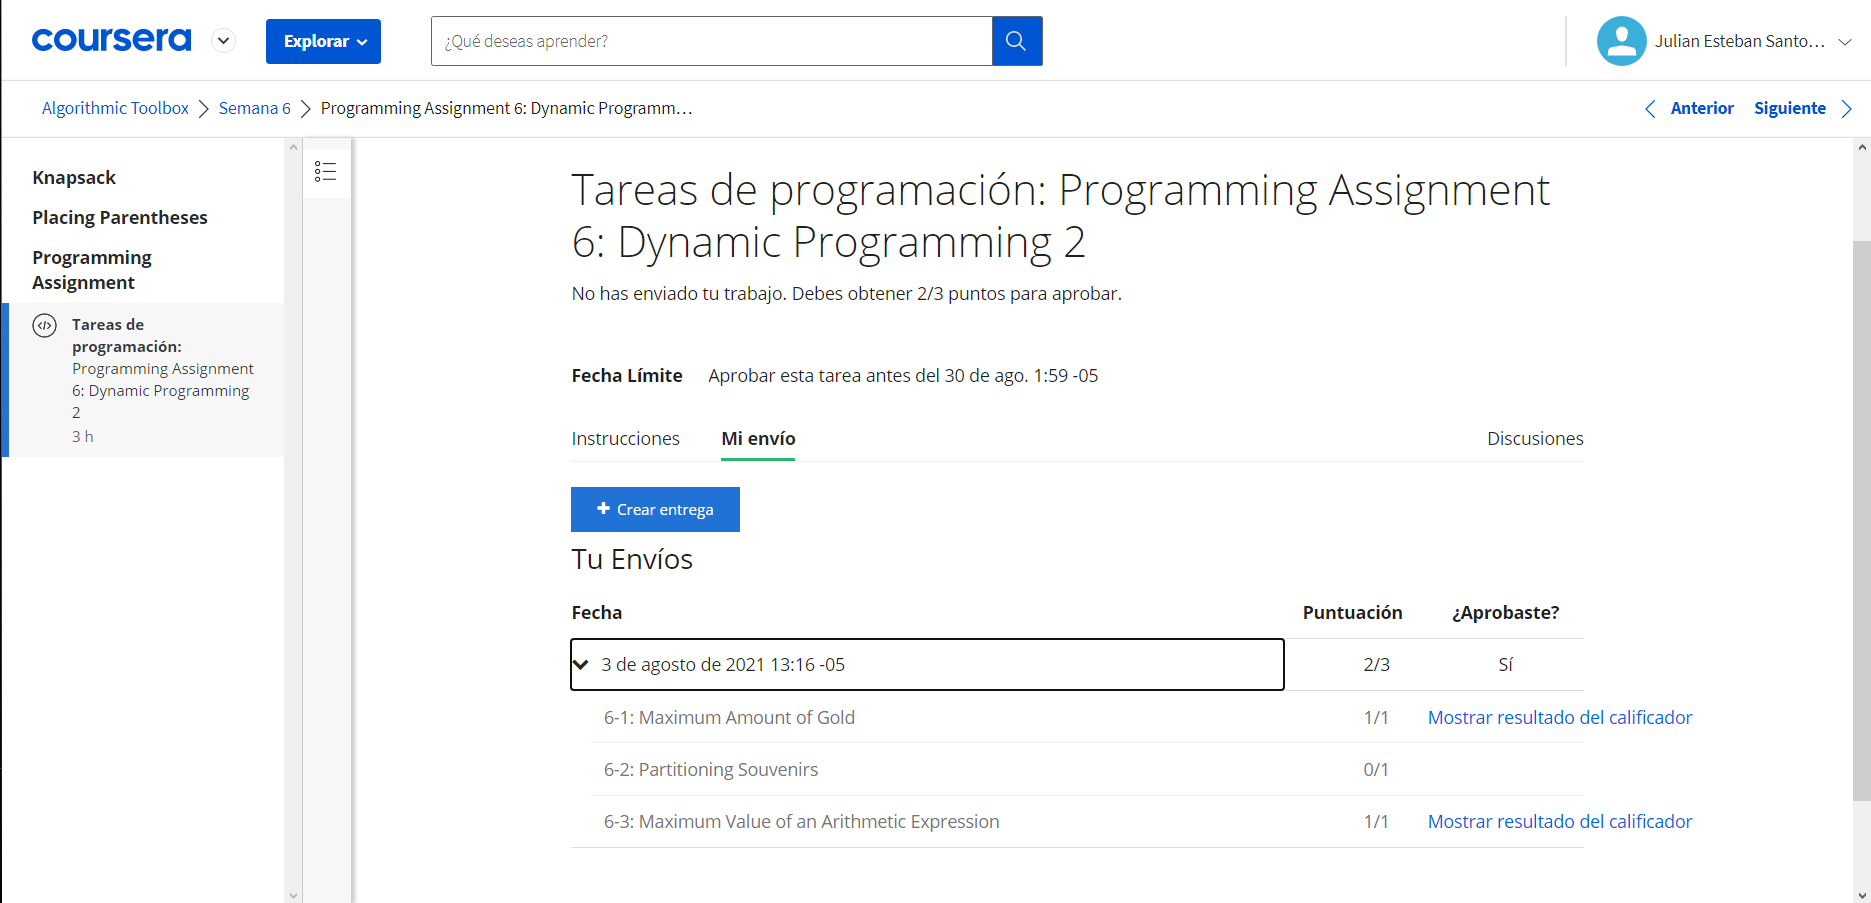